# Demo No. 8 - Accessing config parameters inside your script

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from astropy import units as u

from elisa import BinarySystem
from elisa import Star
from elisa import Observer

All parameters available in configuration file (see. https://github.com/mikecokina/elisa/blob/master/src/elisa/conf/elisa_conf_docs.ini) can be set as well inside the script. Lets now use this capability to investigate the effect of different limb darkening laws on the shape of the light curve. The config file can be accesed using following import:

In [2]:
from elisa import settings

In case of the limb darkening, there are 3 limb darkening laws available: `linear` (or `cosine`), `logarithmic` and `square_root`:

In [3]:
settings.AVAILABLE_LD_LAWS

['linear', 'cosine', 'logarithmic', 'square_root']

Lets define our test binary system and observer class, on which we will investigate the efffect of the limb darkening:

In [4]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.5,
    synchronicity=1.0,
    t_eff=6000 * u.K,
    gravity_darkening=1.0,
    albedo=0.6,
    metallicity=0,
)

binary_system = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=80 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

observer = Observer(passband=['Generic.Bessell.V'], system=binary_system)

2021-04-07 10:42:20,602 - 8275 - binary_system.system - INFO: initialising object BinarySystem
2021-04-07 10:42:20,663 - 8275 - binary_system.system - INFO: setting discretization factor of secondary component to 8.61 according to discretization factor of the primary component.
2021-04-07 10:42:20,663 - 8275 - observer.observer - INFO: initialising Observer instance


All configuration file parameters can be accessed as an attribute of the `settings` object in capitalised form. Changing the parameters should be done using `settings.configure()` statement which can use the name of the parameter as an argument or the names of the changed parameters can be passed as keyword arguments. Here we can use this capability to investigate the effect of the different limb darkening laws on the shape of the light curve (you may need to zoom the figure in order to see the differences):

<IPython.core.display.Javascript object>


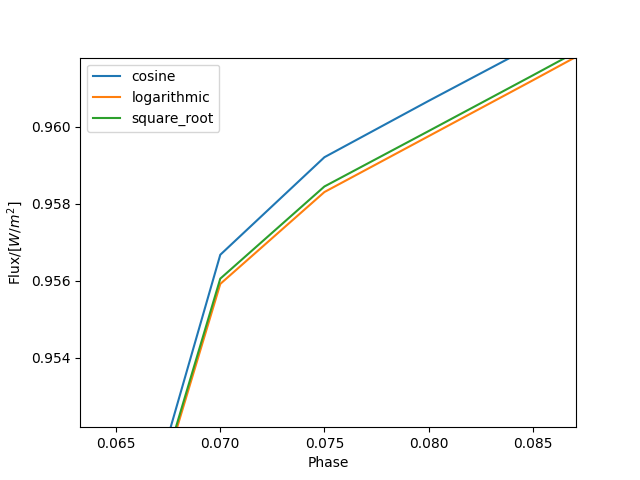

2021-04-07 10:43:40,675 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:43:41,941 - 8275 - observer.observer - INFO: observation finished
2021-04-07 10:43:41,943 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:43:43,204 - 8275 - observer.observer - INFO: observation finished
2021-04-07 10:43:43,206 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:43:44,479 - 8275 - observer.observer - INFO: observation finished


In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for ld_law in settings.AVAILABLE_LD_LAWS[1:]:
    settings.configure(LIMB_DARKENING_LAW = ld_law)
    
    phase, flux = observer.lc(
        from_phase=-0.6,
        to_phase=0.6,
        phase_step=0.005,
        normalize=True
    )
    
    ax1.plot(phase, flux['Generic.Bessell.V'], label=ld_law)

ax1.legend()
ax1.set_xlabel('Phase')
ax1.set_ylabel(r'Flux/$[W/ m^2]$')
plt.show()    

In the second example we can change the number of reflection number iterations in calculation of the reflection effect in order to get an idea how much iterations we need to achieve desired precision (reflection effect can be simply turned of with parameter `REFLECTION_EFFECT` which accepts `bool` values which can save a lot of comutational time in case of very wide binaries):

<IPython.core.display.Javascript object>


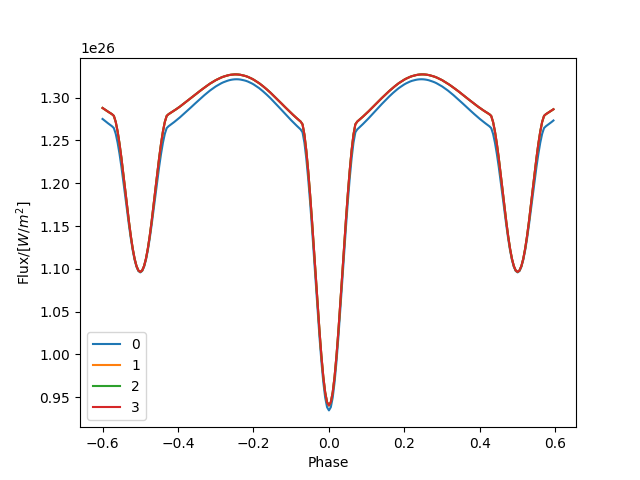

2021-04-07 10:44:44,767 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:44:45,885 - 8275 - observer.observer - INFO: observation finished
2021-04-07 10:44:45,887 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:44:47,175 - 8275 - observer.observer - INFO: observation finished
2021-04-07 10:44:47,176 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:44:48,355 - 8275 - observer.observer - INFO: observation finished
2021-04-07 10:44:48,356 - 8275 - observer.observer - INFO: observation is running
2021-04-07 10:44:49,647 - 8275 - observer.observer - INFO: observation finished


In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for iterations in range(4):
    settings.configure(**{'REFLECTION_EFFECT_ITERATIONS': iterations})
    
    phase, flux = observer.lc(
        from_phase=-0.6,
        to_phase=0.6,
        phase_step=0.005
    )
    
    ax1.plot(phase, flux['Generic.Bessell.V'], label=iterations)

ax1.legend()
ax1.set_xlabel('Phase')
ax1.set_ylabel(r'Flux/$[W/ m^2]$')
plt.show()